Quick notebook for visualizing the context--graph pairs we're considering

In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, TensorDataset, DataLoader

In [6]:
## Load data
grid_size = 30
data_path = './shortest_path_data/Shortest_Path_training_data'+str(grid_size)+'.pth'
state = torch.load(data_path)

## Extract data from state
train_dataset_e = state['train_dataset_e']
test_dataset_e = state['test_dataset_e']
train_dataset_v = state['train_dataset_v']
test_dataset_v = state['test_dataset_v']
m = state["m"]
A = state["A"].float()
b = state["b"].float()
WW = state["WW"].float()
num_edges = state["num_edges"]
Edge_list = state["Edge_list"]
Edge_list_torch = torch.tensor(Edge_list)

In [7]:
## Initialize data loader
## Training setup
train_dataset = train_dataset_v
test_dataset = test_dataset_v
test_size = 200
train_loader = DataLoader(dataset=train_dataset, batch_size=100,
                              shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=test_size,
                             shuffle=False)

In [8]:
device = 'cpu'
d_batch, path_batch = next(iter(test_loader))
d_batch = d_batch.to(device)
path_batch = path_batch.to(device)

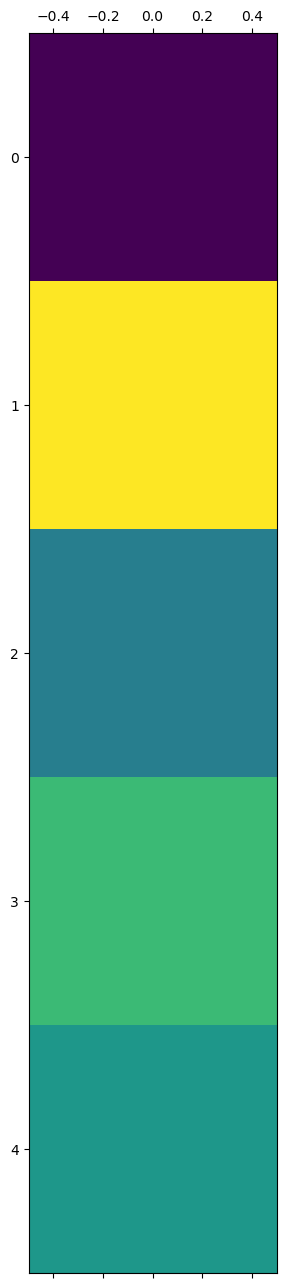

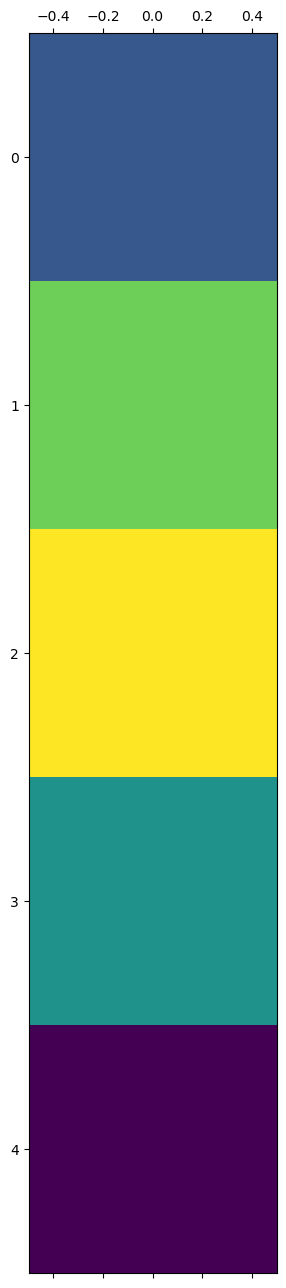

In [17]:
WW = WW.to(device)
for i in range(2):
    # fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    # plt.matshow(path_batch[i,:,:].cpu().detach().numpy())
    # weights = torch.matmul(WW, d_batch[i]).view((grid_size, grid_size))
    # plt.matshow(weights.cpu().detach().numpy())
    # plt.colorbar(orientation="vertical")
    d_temp = d_batch[i,:].cpu().detach().numpy()
    plt.matshow(np.reshape(d_temp, (len(d_temp), 1)))
    plt.savefig('True_d'+str(i)+".pdf")